<a href="https://colab.research.google.com/github/rajaramesh-ds/datascience/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

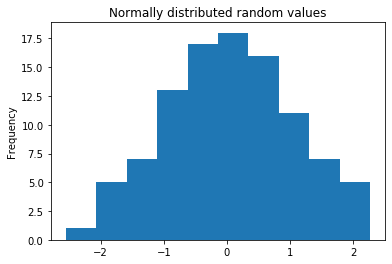

In [0]:
import pandas as pd # This is always assumed but is included here as an introduction.
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
values = np.random.randn(100) # array of normally distributed random numbers
s = pd.Series(values) # generate a pandas series
s.plot(kind='hist', title='Normally distributed random values') # hist computes distribution
plt.show()

In [0]:
s.describe()

count    100.000000
mean       0.059808
std        1.012960
min       -2.552990
25%       -0.643857
50%        0.094096
75%        0.737077
max        2.269755
dtype: float64

In [0]:
df = pd.DataFrame({'A': [1, 2, 1, 4, 3, 5, 2, 3, 4, 1],
'B': [12, 14, 11, 16, 18, 18, 22, 13, 21, 17],
'C': ['a', 'a', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'a']})

In [0]:
df

,A,B,C
0,1,12,a
1,2,14,a
2,1,11,b
3,4,16,a
4,3,18,b
5,5,18,c
6,2,22,b
7,3,13,a
8,4,21,b
9,1,17,a


In [0]:
df.describe()

,A,B
count,10.000000,10.000000
mean,2.600000,16.200000
std,1.429841,3.705851
min,1.000000,11.000000
25%,1.250000,13.250000
50%,2.500000,16.500000
75%,3.750000,18.000000
max,5.000000,22.000000


In [0]:
df['C'].describe()

count     10
unique     3
top        a
freq       5
Name: C, dtype: object

In [0]:
import pandas as pd
import numpy as np
num_securities = 1000
num_periods = 1000
period_frequency = 'W'

start_date = '2000-12-31'
np.random.seed([3,1415])
means = [0, 0]
covariance = [[ 1., 5e-3],
[5e-3, 1.]]
# generates to sets of data m[0] and m[1] with ~0.005 correlation
m = np.random.multivariate_normal(means, covariance,
(num_periods, num_securities)).T

In [0]:
ids = pd.Index(['s{:05d}'.format(s) for s in range(num_securities)], 'ID')
tidx = pd.date_range(start=start_date, periods=num_periods, freq=period_frequency)

In [0]:
security_returns = pd.DataFrame(m[0] / 25 + 1e-7, tidx, ids)
security_signals = pd.DataFrame(m[1], tidx, ids)

In [0]:
def qcut(s, q=5):
  labels = ['q{}'.format(i) for i in range(1, 6)]
  return pd.qcut(s, q, labels=labels)
cut = security_signals.stack().groupby(level=0).apply(qcut)

In [0]:
returns_cut = security_returns.stack().rename('returns') \
.to_frame().set_index(cut, append=True) \
.swaplevel(2, 1).sort_index().squeeze() \
.groupby(level=[0, 1]).mean().unstack()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # This is added back by InteractiveShellApp.init_path()


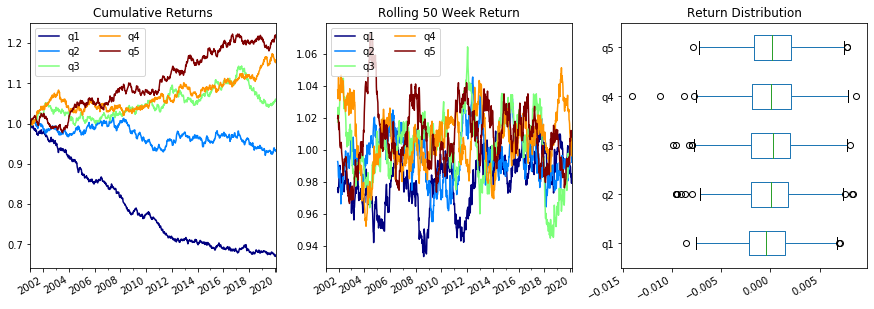

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot2grid((1,3), (0,0))
ax2 = plt.subplot2grid((1,3), (0,1))
ax3 = plt.subplot2grid((1,3), (0,2))

# Cumulative Returns
returns_cut.add(1).cumprod() \
.plot(colormap='jet', ax=ax1, title="Cumulative Returns")
leg1 = ax1.legend(loc='upper left', ncol=2, prop={'size': 10}, fancybox=True)
leg1.get_frame().set_alpha(.8)

# Rolling 50 Week Return
returns_cut.add(1).rolling(50).apply(lambda x: x.prod()) \
.plot(colormap='jet', ax=ax2, title="Rolling 50 Week Return")
leg2 = ax2.legend(loc='upper left', ncol=2, prop={'size': 10}, fancybox=True)
leg2.get_frame().set_alpha(.8)

# Return Distribution
returns_cut.plot.box(vert=False, ax=ax3, title="Return Distribution")
fig.autofmt_xdate()
plt.show()


In [0]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(returns_cut, alpha=0.5, figsize=(8, 8), diagonal='hist')
plt.show()

ModuleNotFoundError: ignored

In [0]:
def max_dd(returns):
  """returns is a series"""
  r = returns.add(1).cumprod()
  dd = r.div(r.cummax()).sub(1)
  mdd = dd.min()
  end = dd.argmin()
  start = r.loc[:end].argmax()
  return mdd, start, end
def max_dd_df(returns):
  """returns is a dataframe"""
  series = lambda x: pd.Series(x, ['Draw Down', 'Start', 'End'])
  return returns.apply(max_dd).apply(series)

In [0]:
max_dd_df(returns_cut)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  import sys


,Draw Down,Start,End
q1,-0.333527,2001-01-07,2020-02-16
q2,-0.092659,2007-06-10,2019-04-14
q3,-0.089682,2017-06-11,2019-07-21
q4,-0.058225,2003-03-16,2008-03-30
q5,-0.046822,2002-01-20,2003-07-06


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  import sys


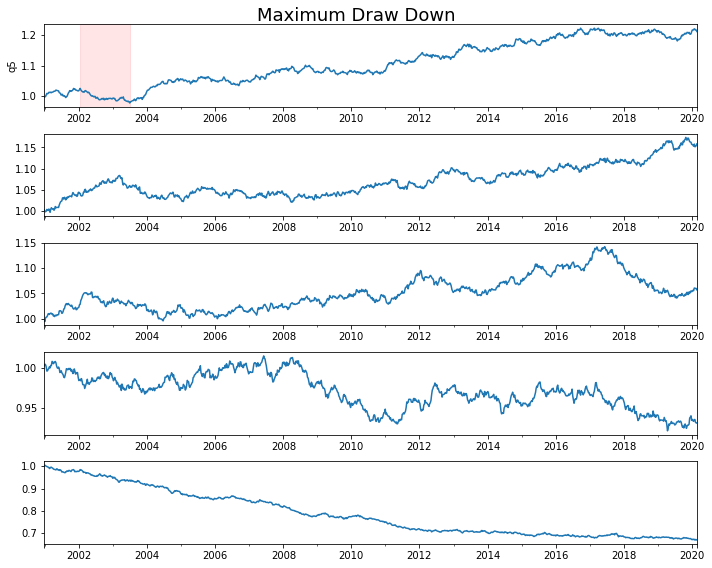

In [0]:
draw_downs = max_dd_df(returns_cut)
fig, axes = plt.subplots(5, 1, figsize=(10, 8))
for i, ax in enumerate(axes[::-1]):
  returns_cut.iloc[:, i].add(1).cumprod().plot(ax=ax)
sd, ed = draw_downs[['Start', 'End']].iloc[i]
ax.axvspan(sd, ed, alpha=0.1, color='r')
ax.set_ylabel(returns_cut.columns[i])
fig.suptitle('Maximum Draw Down', fontsize=18)
fig.tight_layout()
plt.subplots_adjust(top=.95)

In [0]:
def frequency_of_time_series(df):
  start, end = df.index.min(), df.index.max()
  delta = end - start
  return round((len(df) - 1.) * 365.25 / delta.days, 2)
def annualized_return(df):
  freq = frequency_of_time_series(df)
  return df.add(1).prod() ** (1 / freq) - 1
def annualized_volatility(df):
  freq = frequency_of_time_series(df)
  return df.std().mul(freq ** .5)
def sharpe_ratio(df):
  return annualized_return(df) / annualized_volatility(df)
def describe(df):
  r = annualized_return(df).rename('Return')
  v = annualized_volatility(df).rename('Volatility')
  s = sharpe_ratio(df).rename('Sharpe')
  skew = df.skew().rename('Skew')
  kurt = df.kurt().rename('Kurtosis')
  desc = df.describe().T
  return pd.concat([r, v, s, skew, kurt, desc], axis=1).T.drop('count')


In [0]:
describe(returns_cut)

,q1,q2,q3,q4,q5
Return,-0.007609,-0.001375,0.001067,0.002821,0.003687
Volatility,0.019584,0.020445,0.020629,0.021185,0.020172
Sharpe,-0.388525,-0.067278,0.051709,0.133176,0.182792
Skew,0.040430,-0.085828,-0.078071,-0.067522,0.005652
Kurtosis,-0.174206,0.203038,0.026385,0.370249,-0.160678
mean,-0.000395,-0.000068,0.000060,0.000151,0.000196
std,0.002711,0.002830,0.002856,0.002933,0.002792
min,-0.008608,-0.009614,-0.009845,-0.014037,-0.007913
25%,-0.002196,-0.002018,-0.001956,-0.001833,-0.001694
50%,-0.000434,0.000065,0.000210,0.000029,0.000146


In [0]:
import pandas as pd
df = pd.DataFrame(columns = ['A', 'B', 'C'])
df

,A,B,C


In [0]:
df.loc[0, 'A'] = 1
df

,A,B,C
0,1,NaN,NaN


In [0]:
df.loc[1] = [2, 3, 4]
df


,A,B,C
0,1,NaN,NaN
1,2,3,4


In [0]:
df.loc[2] = {'A': 3, 'C': 9, 'B': 9}
df

,A,B,C
0,1,NaN,NaN
1,2,3,4
2,3,9,9


In [0]:
df.loc[1] = [5, 6, 7]
df

,A,B,C
0,1,NaN,NaN
1,5,6,7
2,3,9,9


In [0]:
df.loc[0, 'B'] = 8
df

,A,B,C
0,1,8,NaN
1,5,6,7
2,3,9,9


In [0]:
df1 = pd.DataFrame(columns = ['A', 'B'])
df2 = pd.DataFrame(columns = ['B', 'C'])

In [0]:
df1.loc[0] = ['a1','b1']
df1.loc[1] = ['a2','b2']
df2.loc[1] = ['b1','c1']

In [0]:
df1


,A,B
1,a2,b2
0,a1,b1


In [0]:
df2

,B,C
1,b1,c1


In [0]:
df1.append(df2)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,A,B,C
1,a2,b2,NaN
0,a1,b1,NaN
1,NaN,b1,c1


In [0]:
df1.append(df2, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,A,B,C
0,a2,b2,NaN
1,a1,b1,NaN
2,NaN,b1,c1


# ***`Chapter 4: Boolean indexing of dataframes`***

In [0]:
df = pd.DataFrame({"color": ['red', 'blue', 'red', 'blue']},
index=[True, False, True, False])

In [0]:
df

,color
True,red
False,blue
True,red
False,blue


In [0]:
df.loc[True]

,color
True,red
True,red


In [0]:
df.iloc[True]

TypeError: ignored

In [0]:
df.iloc[1]

color    blue
dtype: object

In [0]:
df.ix[True]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,color
True,red
True,red


In [0]:
df.ix[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


color    blue
dtype: object

In [0]:
df = pd.DataFrame({"color": ['red', 'blue', 'red', 'blue'], "name": ['rose','violet','tulip','harebell'], "size": ['big', 'big', 'small', 'small']})
df

,color,name,size
0,red,rose,big
1,blue,violet,big
2,red,tulip,small
3,blue,harebell,small


In [0]:
df[[True, False, False, True]]

,color,name,size
0,red,rose,big
3,blue,harebell,small


In [0]:
df['size'] == 'small'

0    False
1    False
2     True
3     True
Name: size, dtype: bool

In [0]:
size_small_mask = df['size'] == 'small'
df[size_small_mask]

,color,name,size
2,red,tulip,small
3,blue,harebell,small


In [0]:
size_small_mask.__getitem__

<bound method Series.__getitem__ of 0    False
1    False
2     True
3     True
Name: size, dtype: bool>

In [0]:
size_small_mask.__getitem__(0)

False

In [0]:
df

,color,name,size
0,red,rose,big
1,blue,violet,big
2,red,tulip,small
3,blue,harebell,small


In [0]:
df = df.set_index('name')

In [0]:
df

,color,size
name,,
rose,red,big
violet,blue,big
tulip,red,small
harebell,blue,small


In [0]:
rose_mask = df.index == 'rose'
df[rose_mask]

,color,size
name,,
rose,red,big


In [0]:
df.loc['rose']

color    red
size     big
Name: rose, dtype: object

In [0]:
df.loc[['rose']]

,color,size
name,,
rose,red,big


# ***Chapter 5: Categorical data***

In [0]:
s = pd.Series(["a","b","c","a","c"], dtype="category")

In [0]:
s

0    a
1    b
2    c
3    a
4    c
dtype: category
Categories (3, object): [a, b, c]

In [0]:
df = pd.DataFrame({"A":["a","b","c","a", "c"]})

In [0]:
df["B"] = df["A"].astype('category')

In [0]:
df["C"] = pd.Categorical(df["A"])

In [0]:
df

,A,B,C
0,a,a,a
1,b,b,b
2,c,c,c
3,a,a,a
4,c,c,c


In [0]:
df["D"] = df["A"].astype('category')

In [0]:
df.dtypes

A      object
B    category
C    category
D    category
dtype: object

In [0]:
df1 = pd.DataFrame({"A":["a","b","c","a", "c"]}, dtype="category")

In [0]:
df1["E"] = df1["A"]

In [0]:
df1.dtypes

A    category
E    category
dtype: object

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.DataFrame(np.random.choice(['foo','bar','baz'], size=(100000,3)))
df = df.apply(lambda col: col.astype('category'))

In [0]:
df.head()

,0,1,2
0,baz,baz,bar
1,foo,baz,bar
2,bar,foo,foo
3,bar,bar,foo
4,baz,bar,baz


In [0]:
df.dtypes

0    category
1    category
2    category
dtype: object

In [0]:
df.shape

(100000, 3)

# ***Chapter 6: Computational Tools***

In [0]:
df = pd.DataFrame(np.random.randn(1000, 3), columns=['a', 'b', 'c'])

In [0]:
df.corr()

,a,b,c
a,1.000000,0.026820,0.007904
b,0.026820,1.000000,-0.067578
c,0.007904,-0.067578,1.000000


In [0]:
df.corr(method='spearman')

,a,b,c
a,1.000000,0.014438,0.015894
b,0.014438,1.000000,-0.067528
c,0.015894,-0.067528,1.000000


# ***Chapter 7: Creating DataFrames***

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']})

In [0]:
df

,numbers,colors
0,1,red
1,2,white
2,3,blue


In [0]:
print(df)

   numbers colors
0        1    red
1        2  white
2        3   blue


In [0]:
df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']},
columns=['numbers', 'colors'])

In [0]:
print(df)

   numbers colors
0        1    red
1        2  white
2        3   blue


In [0]:
import numpy as np
import pandas as pd
# Set the seed for a reproducible sample
np.random.seed(0)
df = pd.DataFrame(np.random.randn(5, 3), columns=list('ABC'))
print(df)

          A         B         C
0  1.764052  0.400157  0.978738
1  2.240893  1.867558 -0.977278
2  0.950088 -0.151357 -0.103219
3  0.410599  0.144044  1.454274
4  0.761038  0.121675  0.443863


In [0]:
df = pd.DataFrame(np.arange(15).reshape(5,3),columns=list('ABC'))
print(df)

    A   B   C
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14


In [0]:
df = pd.DataFrame(np.arange(48).reshape(8,6),columns=list('ABCDEF'))
print(df)
# Output:
# A B C D E F
# 0 0 1 2 3 4 5
# 1 6 7 8 9 10 11
# 2 12 13 14 15 16 17
# 3 18 19 20 21 22 23
# 4 24 25 26 27 28 29
# 5 30 31 32 33 34 35
# 6 36 37 38 39 40 41
# 7 42 43 44 45 46 47


    A   B   C   D   E   F
0   0   1   2   3   4   5
1   6   7   8   9  10  11
2  12  13  14  15  16  17
3  18  19  20  21  22  23
4  24  25  26  27  28  29
5  30  31  32  33  34  35
6  36  37  38  39  40  41
7  42  43  44  45  46  47


In [0]:
df.ix[::2,0] = np.nan # in column 0, set elements with indices 0,2,4, ... to NaN
df.ix[::4,1] = pd.NaT # in column 1, set elements with indices 0,4, ... to np.NaT
df.ix[:3,2] = 'nan' # in column 2, set elements with index from 0 to 3 to 'nan'
df.ix[:,5] = None # in column 5, set all elements to None
df.ix[5,:] = None # in row 5, set all elements to None
df.ix[7,:] = np.nan # in row 7, set all elements to NaN
print(df)
# Output:
# A B C D E F
# 0 NaN NaT nan 3 4 None
# 1 6 7 nan 9 10 None
# 2 NaN 13 nan 15 16 None
# 3 18 19 nan 21 22 None
# 4 NaN NaT 26 27 28 None
# 5 NaN None None NaN NaN None
# 6 NaN 37 38 39 40 None
# 7 NaN NaN NaN NaN NaN NaN

      A     B     C     D     E     F
0   NaN   NaT   nan   3.0   4.0  None
1   6.0     7   nan   9.0  10.0  None
2   NaN    13   nan  15.0  16.0  None
3  18.0    19   nan  21.0  22.0  None
4   NaN   NaT    26  27.0  28.0  None
5   NaN  None  None   NaN   NaN  None
6   NaN    37    38  39.0  40.0  None
7   NaN   NaN   NaN   NaN   NaN   NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avo

In [0]:
import pandas as pd
import numpy as np
np.random.seed(123)
x = np.random.standard_normal(4)
y = range(4)
df = pd.DataFrame({'X':x, 'Y':y})


In [0]:
df


,X,Y
0,-1.085631,0
1,0.997345,1
2,0.282978,2
3,-1.506295,3


In [0]:
print(df)

          X  Y
0 -1.085631  0
1  0.997345  1
2  0.282978  2
3 -1.506295  3


In [0]:
import pandas as pd
data = [
('p1', 't1', 1, 2),
('p1', 't2', 3, 4),
('p2', 't1', 5, 6),
('p2', 't2', 7, 8),
('p2', 't3', 2, 8)
]
df = pd.DataFrame(data)
print(df)

    0   1  2  3
0  p1  t1  1  2
1  p1  t2  3  4
2  p2  t1  5  6
3  p2  t2  7  8
4  p2  t3  2  8


In [0]:
import pandas as pd
# Create DF from dict of lists/ndarrays
df = pd.DataFrame({'A' : [1, 2, 3, 4],
'B' : [4, 3, 2, 1]})
df
# Output:
# A B
# 0 1 4
# 1 2 3
# 2 3 2
# 3 4 1

,A,B
0,1,4
1,2,3
2,3,2
3,4,1


In [0]:
df = pd.DataFrame({'A' : [1, 2, 3, 4], 'B' : [5, 5, 5]}) # a ValueError is raised

ValueError: ignored

In [0]:
import pandas as pd
import numpy as np
np.random.seed(123)
x = np.random.standard_normal(4)
y = range(4)
df = pd.DataFrame({'X':x, 'Y':y})
df

,X,Y
0,-1.085631,0
1,0.997345,1
2,0.282978,2
3,-1.506295,3


In [0]:
import pandas as pd
import numpy as np
np.random.seed(0)
# create an array of 5 dates starting at '2015-02-24', one per minute
rng = pd.date_range('2015-02-24', periods=5, freq='T')
df = pd.DataFrame({ 'Date': rng, 'Val': np.random.randn(len(rng)) })
print (df)

                 Date       Val
0 2015-02-24 00:00:00  1.764052
1 2015-02-24 00:01:00  0.400157
2 2015-02-24 00:02:00  0.978738
3 2015-02-24 00:03:00  2.240893
4 2015-02-24 00:04:00  1.867558


In [0]:
# create an array of 5 dates starting at '2015-02-24', one per day
rng = pd.date_range('2015-02-26', periods=5, freq='D')
df = pd.DataFrame({ 'Date': rng, 'Val' : np.random.randn(len(rng))})
print (df)


        Date       Val
0 2015-02-26  0.144044
1 2015-02-27  1.454274
2 2015-02-28  0.761038
3 2015-03-01  0.121675
4 2015-03-02  0.443863


In [0]:
# create an array of 5 dates starting at '2015-02-24', one every 3 years
rng = pd.date_range('2015-02-24', periods=5, freq='3A')
df = pd.DataFrame({ 'Date': rng, 'Val' : np.random.randn(len(rng))})
print (df)

        Date       Val
0 2015-12-31  0.333674
1 2018-12-31  1.494079
2 2021-12-31 -0.205158
3 2024-12-31  0.313068
4 2027-12-31 -0.854096


In [0]:
import pandas as pd
import numpy as np
np.random.seed(0)
rng = pd.date_range('2015-02-24', periods=5, freq='T')
df = pd.DataFrame({ 'Val' : np.random.randn(len(rng)) }, index=rng)
print (df)

                          Val
2015-02-24 00:00:00  1.764052
2015-02-24 00:01:00  0.400157
2015-02-24 00:02:00  0.978738
2015-02-24 00:03:00  2.240893
2015-02-24 00:04:00  1.867558


In [0]:
#Alias Description
#####################
#B business day frequency
#C custom business day frequency (experimental)
#D calendar day frequency
#W weekly frequency
#M month end frequency
#BM business month end frequency
#CBM custom business month end frequency
#MS month start frequency
#BMS business month start frequency
#CBMS custom business month start frequency
#Q quarter end frequency
#BQ business quarter endfrequency
#QS quarter start frequency
#BQS business quarter start frequency
#A year end frequency
#BA business year end frequency
#AS year start frequency
#BAS business year start frequency
#BH business hour frequency
#H hourly frequency
#T, min minutely frequency
#S secondly frequency
#L, ms milliseconds
#U, us microseconds
#N nanoseconds

In [0]:
import pandas as pd
import numpy as np

In [0]:
np.random.seed(0)
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
'foo', 'foo', 'qux', 'qux'],
['one', 'two', 'one', 'two',
'one', 'two', 'one', 'two']]))
idx = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [0]:
idx = pd.MultiIndex.from_product([['bar', 'baz', 'foo', 'qux'],['one','two']])

In [5]:
df = pd.DataFrame(np.random.randn(8, 2), index=idx, columns=['A', 'B'])
print (df)

                A         B
bar one  1.764052  0.400157
    two  0.978738  2.240893
baz one  1.867558 -0.977278
    two  0.950088 -0.151357
foo one -0.103219  0.410599
    two  0.144044  1.454274
qux one  0.761038  0.121675
    two  0.443863  0.333674


In [0]:
import pandas as pd

In [7]:
# Save dataframe to pickled pandas object
df.to_pickle(file_name) # where to save it usually as a .plk
# Load dataframe from pickled pandas object
df= pd.read_pickle(file_name)

NameError: ignored

In [8]:
import pandas as pd
L = [{'Name': 'John', 'Last Name': 'Smith'},
{'Name': 'Mary', 'Last Name': 'Wood'}]
pd.DataFrame(L)

,Name,Last Name
0,John,Smith
1,Mary,Wood


In [9]:
L = [{'Name': 'John', 'Last Name': 'Smith', 'Age': 37},
{'Name': 'Mary', 'Last Name': 'Wood'}]
pd.DataFrame(L)

,Name,Last Name,Age
0,John,Smith,37.0
1,Mary,Wood,NaN


In [0]:
import pandas as pd
import numpy as np
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
idx_row = pd.MultiIndex.from_arrays(arrays, names=['Row_First', 'Row_Second'])
idx_col = pd.MultiIndex.from_product([['A','B'], ['i', 'ii']],
names=['Col_First','Col_Second'])
df = pd.DataFrame(np.random.randn(8,4), index=idx_row, columns=idx_col)

In [12]:
df.xs('two', level='Row_Second', axis=0)

Col_First          A                   B          
Col_Second         i        ii         i        ii
Row_First                                         
bar        -0.510805 -1.180632 -0.028182  0.428332
baz        -0.672460 -0.359553 -0.813146 -1.726283
foo        -0.907298  0.051945  0.729091  0.128983
qux        -0.870797 -0.578850 -0.311553  0.056165

In [13]:
df.xs('ii', level=1, axis=1)

Col_First                    A         B
Row_First Row_Second                    
bar       one        -0.212740  0.386902
          two        -1.180632  0.428332
baz       one         0.302472 -0.362741
          two        -0.359553 -1.726283
foo       one        -0.401781  0.462782
          two         0.051945  0.128983
qux       one        -1.234826 -0.684810
          two        -0.578850  0.056165

In [14]:
df.xs('ii', level='Col_Second', axis=1) = 0

SyntaxError: ignored

In [0]:
import pandas as pd
import numpy as np
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
idx_row = pd.MultiIndex.from_arrays(arrays, names=['Row_First', 'Row_Second'])
idx_col = pd.MultiIndex.from_product([['A','B'], ['i', 'ii']],
names=['Col_First','Col_Second'])
df = pd.DataFrame(np.random.randn(8,4), index=idx_row, columns=idx_col)

In [16]:
df.loc[(slice(None),'two'),:]

Col_First                    A                   B          
Col_Second                   i        ii         i        ii
Row_First Row_Second                                        
bar       two         1.488252  1.895889  1.178780 -0.179925
baz       two         0.208275  0.976639  0.356366  0.706573
foo       two         1.883151 -1.347759 -1.270485  0.969397
qux       two         1.922942  1.480515  1.867559  0.906045

In [17]:
df.loc[:,(slice(None),'ii')]

Col_First                    A         B
Col_Second                  ii        ii
Row_First Row_Second                    
bar       one         0.900826 -1.536244
          two         1.895889 -0.179925
baz       one         1.054452  1.222445
          two         0.976639  0.706573
foo       one         1.785870  0.401989
          two        -1.347759  0.969397
qux       one         1.943621 -0.747455
          two         1.480515  0.906045

In [18]:
df.loc[(slice(None),'two'),(slice(None),'ii')]

,Col_First,A,B
,Col_Second,ii,ii
Row_First,Row_Second,,
bar,two,1.895889,-0.179925
baz,two,0.976639,0.706573
foo,two,-1.347759,0.969397
qux,two,1.480515,0.906045


In [0]:
df.loc[(slice(None),'two'),(slice(None),'ii')]=0


In [20]:
df

Col_First                    A                   B          
Col_Second                   i        ii         i        ii
Row_First Row_Second                                        
bar       one        -1.165150  0.900826  0.465662 -1.536244
          two         1.488252  0.000000  1.178780  0.000000
baz       one        -1.070753  1.054452 -0.403177  1.222445
          two         0.208275  0.000000  0.356366  0.000000
foo       one         0.010500  1.785870  0.126912  0.401989
          two         1.883151  0.000000 -1.270485  0.000000
qux       one        -1.173123  1.943621 -0.413619 -0.747455
          two         1.922942  0.000000  1.867559  0.000000

In [21]:
pd.Series([1.,2.,3.,4.,5.]).astype(object)

0    1
1    2
2    3
3    4
4    5
dtype: object

In [22]:
type(pd.Series([1.,2.,3.,4.,5.]).astype(object)[0])

float

In [23]:
pd.Series([1.,2.,3.,4.,5.]).astype(str)

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: object

In [24]:
type(pd.Series([1.,2.,3.,4.,5.]).astype(str)[0])

str

In [0]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0], 'C': [True, False, True]})

In [26]:
df

,A,B,C
0,1,1.0,True
1,2,2.0,False
2,3,3.0,True


In [27]:
df.dtypes

A      int64
B    float64
C       bool
dtype: object

In [29]:
df['A'].dtype

dtype('int64')

In [0]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0],
'C': ['1.1.2010', '2.1.2011', '3.1.2011'],
'D': ['1 days', '2 days', '3 days'],
'E': ['1', '2', '3']})

In [31]:
df

,A,B,C,D,E
0,1,1.0,1.1.2010,1 days,1
1,2,2.0,2.1.2011,2 days,2
2,3,3.0,3.1.2011,3 days,3


In [32]:
df.dtypes

A      int64
B    float64
C     object
D     object
E     object
dtype: object

In [33]:
df['A'].astype('float')

0    1.0
1    2.0
2    3.0
Name: A, dtype: float64

In [34]:
df['B'].astype('int')

0    1
1    2
2    3
Name: B, dtype: int64

In [35]:
pd.to_numeric(df['E'])

0    1
1    2
2    3
Name: E, dtype: int64

In [36]:
pd.to_numeric(pd.Series(['1', '2', 'a']), errors='ignore')

0    1
1    2
2    a
dtype: object

In [37]:
pd.to_numeric(pd.Series(['1', '2', 'a']), errors='coerce')

0    1.0
1    2.0
2    NaN
dtype: float64

In [0]:
df = pd.DataFrame({'A': [1, 'x', 'z'],
'B': [1.0, 2.0, 3.0],
'C': [True, False, True]})

In [41]:
pd.to_numeric(df.A, errors='coerce').isnull()

0    False
1     True
2     True
Name: A, dtype: bool

In [42]:
df[pd.to_numeric(df.A, errors='coerce').isnull()]

,A,B,C
1,x,2.0,False
2,z,3.0,True


In [43]:
pd.to_datetime(df['C'])

TypeError: ignored

In [44]:
pd.to_datetime('2.1.2011', dayfirst=True)

Timestamp('2011-01-02 00:00:00')

In [45]:
pd.to_timedelta(df['D'])

KeyError: ignored

In [0]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0], 'C': ['a', 'b', 'c'],
'D': [True, False, True]})

In [47]:
df

,A,B,C,D
0,1,1.0,a,True
1,2,2.0,b,False
2,3,3.0,c,True


In [48]:
# Select numbers
df.select_dtypes(include=['number']) # You need to use a list

,A,B
0,1,1.0
1,2,2.0
2,3,3.0


In [49]:
# Select numbers and booleans
df.select_dtypes(include=['number', 'bool'])

,A,B,D
0,1,1.0,True
1,2,2.0,False
2,3,3.0,True


In [50]:
# Select numbers and booleans but exclude int64
df.select_dtypes(include=['number', 'bool'], exclude=['int64'])

,B,D
0,1.0,True
1,2.0,False
2,3.0,True


In [0]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1.0, 2.0, 3.0], 'C': ['a', 'b', 'c'],
'D': [True, False, True]})

In [52]:
df.get_dtype_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    1
int64      1
bool       1
object     1
dtype: int64

# ***Chapter 10: Dealing with categorical variables***

In [53]:
df = pd.DataFrame({'Name':['John Smith', 'Mary Brown'],
'Gender':['M', 'F'], 'Smoker':['Y', 'N']})
print(df)

         Name Gender Smoker
0  John Smith      M      Y
1  Mary Brown      F      N


In [55]:
df_with_dummies = pd.get_dummies(df, columns=['Gender', 'Smoker'])
print(df_with_dummies)

         Name  Gender_F  Gender_M  Smoker_N  Smoker_Y
0  John Smith         0         1         0         1
1  Mary Brown         1         0         1         0


# ***Duplicated data***

In [0]:
df = pd.DataFrame({'A':[1,2,3,3,2],
'B':[1,7,3,0,8]})

In [0]:
mask = df.A.duplicated(keep=False)

In [71]:
mask

0    False
1     True
2     True
3     True
4     True
Name: A, dtype: bool

In [72]:
df.ix[mask, 'B'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
df['C'] = df.A.mask(mask, 0)

In [74]:
df

,A,B,C
0,1,1,1
1,2,0,0
2,3,0,0
3,3,0,0
4,2,0,0
